In [1]:
import seaborn as sns
import pandas as pd
from _Grafy import getBarChart

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [40]:
df_who_class = pd.crosstab(df.pclass, df.who)
df_who_class

who,child,man,woman
pclass,,,
1,6,119,91
2,19,99,66
3,58,319,114


<Axes: xlabel='pclass'>

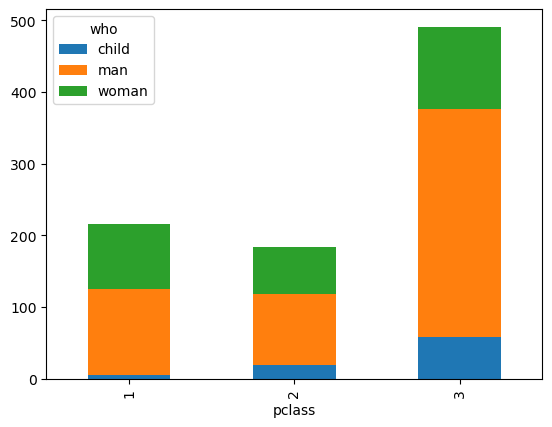

In [5]:
df_who_class.plot(kind='bar', stacked=True)

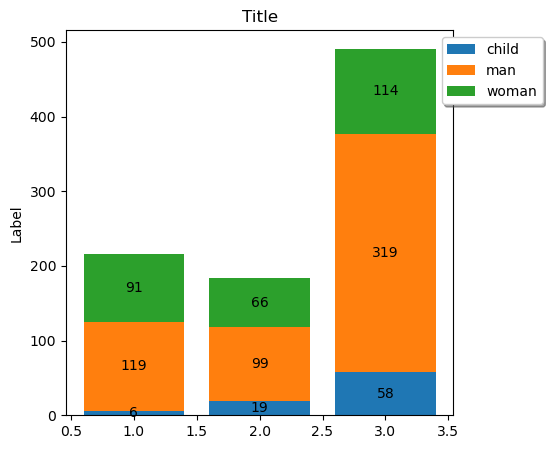

In [6]:
getBarChart(df_who_class)

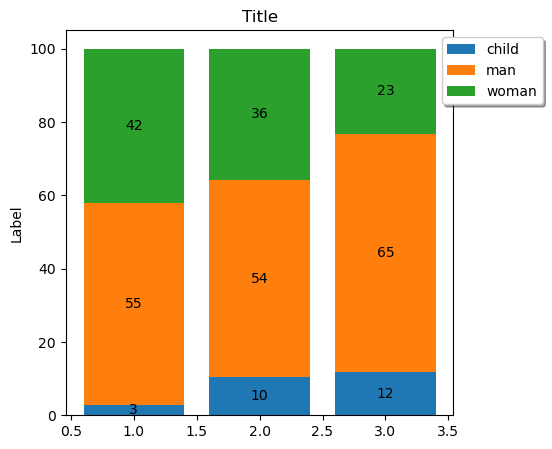

In [7]:
getBarChart(df_who_class, normalize=True)

In [41]:
df_alone_class = pd.crosstab(df.pclass, df.alone)
df_alone_class

alone,False,True
pclass,,
1,107,109
2,80,104
3,167,324


<Axes: xlabel='pclass'>

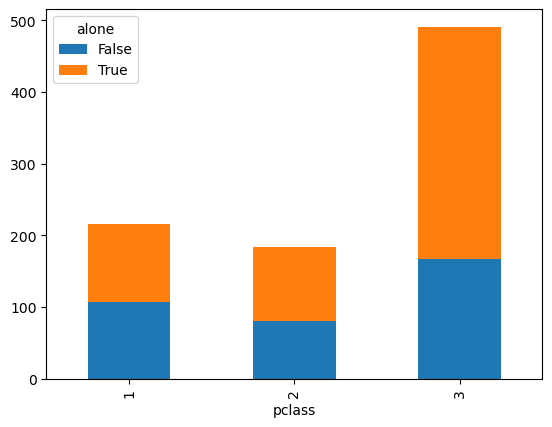

In [42]:
df_alone_class.plot(kind='bar', stacked=True)

In [43]:
getBarChart(df_alone_class)

ValueError: Item wrong length 2 instead of 3.

In [44]:
getBarChart(df_alone_class, normalize=True)

ValueError: Item wrong length 2 instead of 3.

In [45]:
df_alone_class1 = df_alone_class.rename(columns={0:'False', 1:'True'})
df_alone_class1

alone,False,True
pclass,,
1,107,109
2,80,104
3,167,324


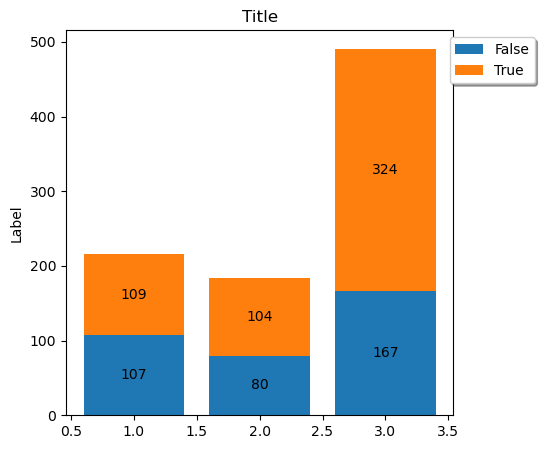

In [46]:
getBarChart(df_alone_class1)

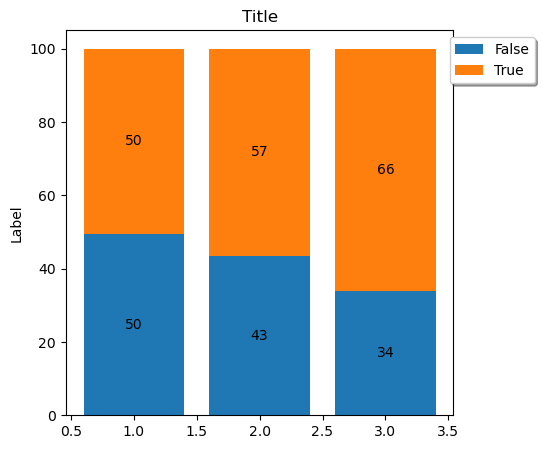

In [47]:
getBarChart(df_alone_class1, normalize=True)

# udělat pro první, druhou a třetí třídu, místo sex survived a zvlášť pro muže a ženy

In [11]:
df_survived_class = pd.crosstab(df.pclass, df.survived)
df_survived_class

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='pclass'>

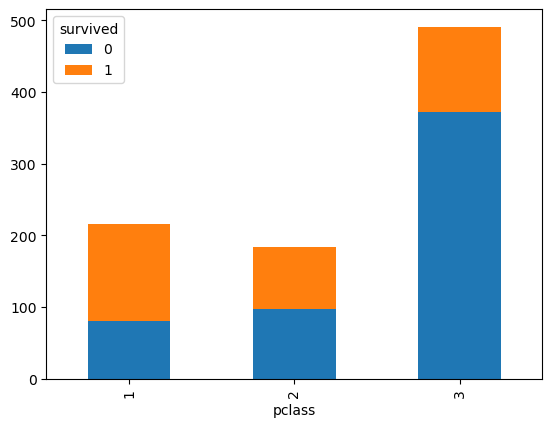

In [12]:
df_survived_class.plot(kind='bar', stacked=True)

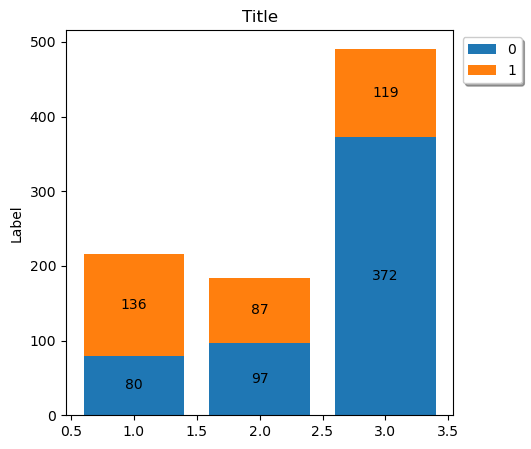

In [13]:
getBarChart(df_survived_class)

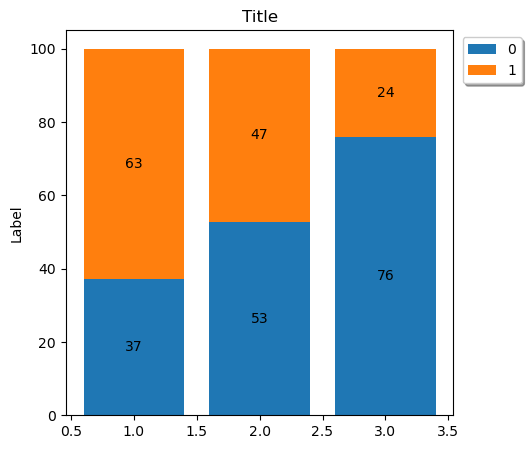

In [14]:
getBarChart(df_survived_class, normalize=True)

In [16]:
df.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [17]:
df[df['who'] == 'man']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [18]:
df_survived_class_man = pd.crosstab(df[df['who'] == 'man'].pclass, df[df['who'] == 'man'].survived)
df_survived_class_woman = pd.crosstab(df[df['who'] == 'woman'].pclass, df[df['who'] == 'woman'].survived)
df_survived_class_child = pd.crosstab(df[df['who'] == 'child'].pclass, df[df['who'] == 'child'].survived)

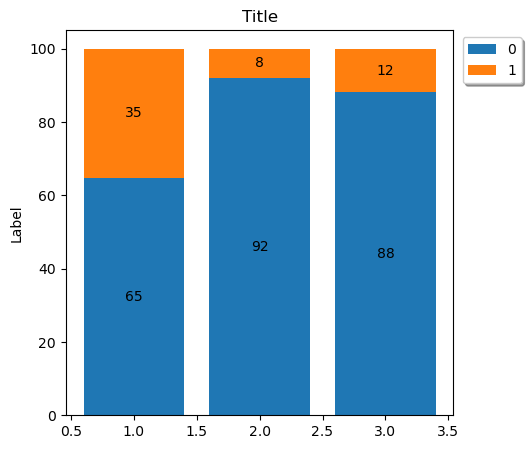

In [20]:
getBarChart(df_survived_class_man, normalize=True)

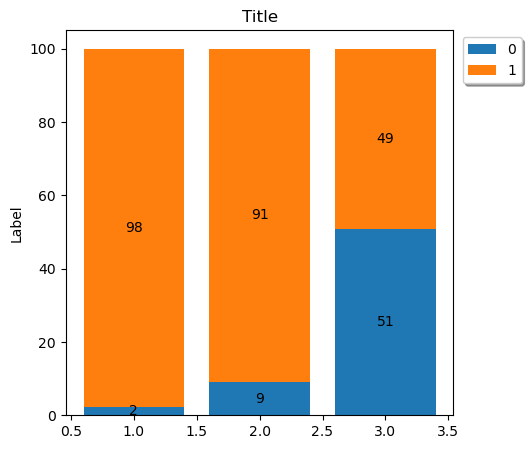

In [21]:
getBarChart(df_survived_class_woman, normalize=True)

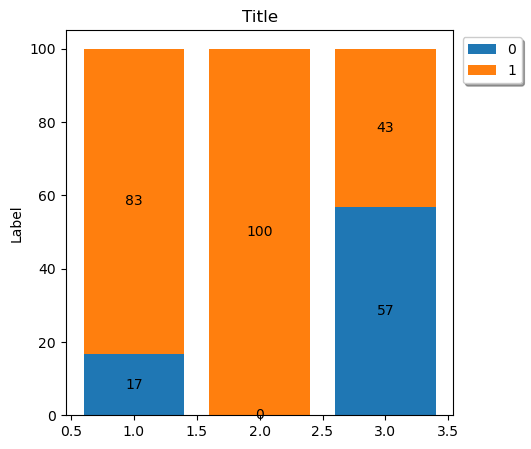

In [22]:
getBarChart(df_survived_class_child, normalize=True)

In [31]:
df_survived_class_alone = pd.crosstab(df[df['alone'] == True].pclass, df[df['alone'] == True].survived)
df_survived_class_alone

survived,0,1
pclass,,
1,51,58
2,68,36
3,255,69


In [32]:
df_survived_class_notalone = pd.crosstab(df[df['alone'] == False].pclass, df[df['alone'] == False].survived)
df_survived_class_notalone

survived,0,1
pclass,,
1,29,78
2,29,51
3,117,50


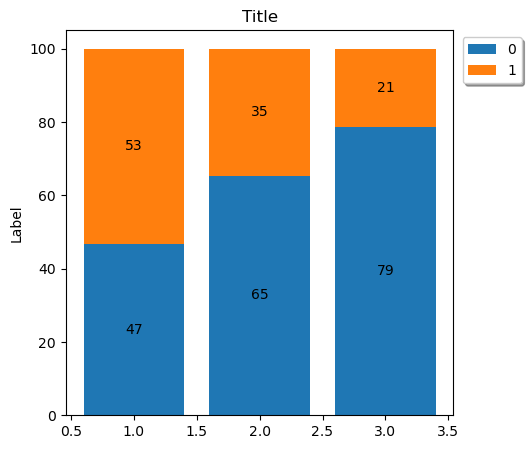

In [33]:
getBarChart(df_survived_class_alone, normalize=True)

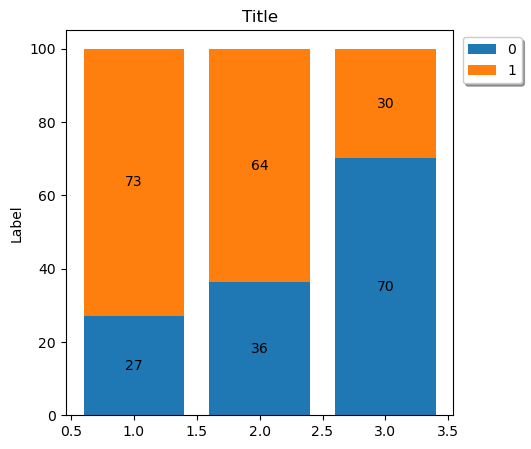

In [34]:
getBarChart(df_survived_class_notalone, normalize=True)

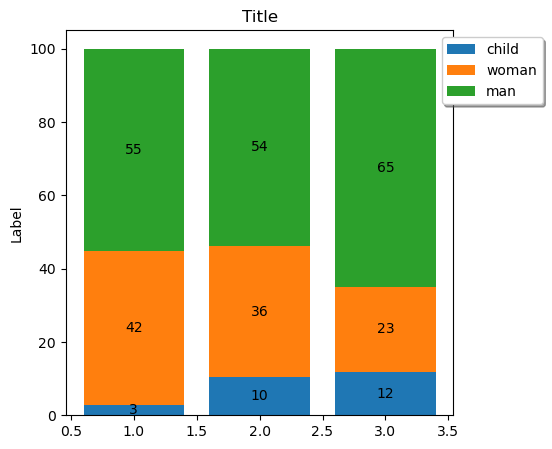

In [48]:
getBarChart(df_who_class, columns=['child', 'woman', 'man'], normalize=True)

In [49]:
df_who_survived_in_class = pd.crosstab(index=df[df['survived'] == True].pclass, columns=df[df['survived'] == True].who)
df_who_survived_in_class

who,child,man,woman
pclass,,,
1,5,42,89
2,19,8,60
3,25,38,56


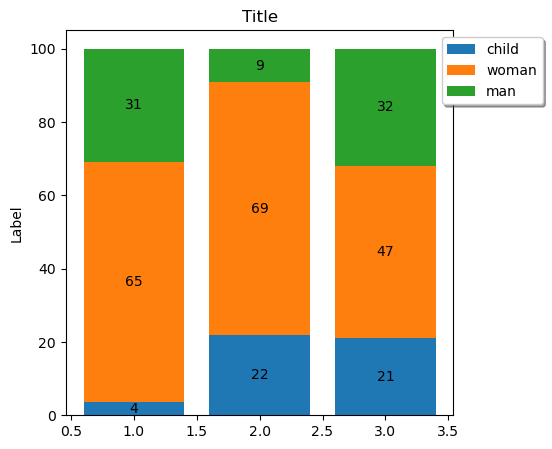

In [21]:
getBarChart(df_who_survived_in_class, columns=['child', 'woman', 'man'], normalize=True)

In [50]:
df_who_notsurvived_in_class = pd.crosstab(index=df[df['survived'] == False].pclass, columns=df[df['survived'] == False].who)
df_who_notsurvived_in_class

who,child,man,woman
pclass,,,
1,1,77,2
2,0,91,6
3,33,281,58


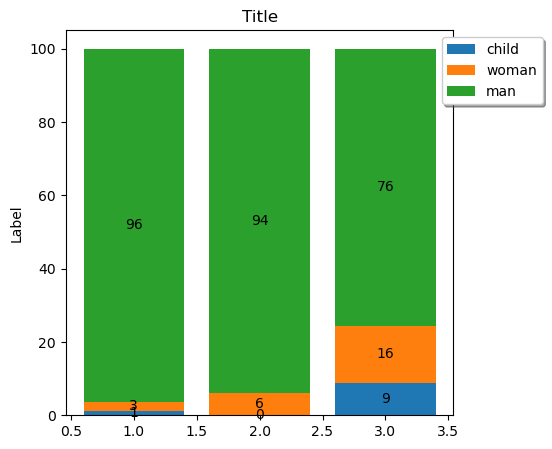

In [51]:
getBarChart(df_who_notsurvived_in_class, columns=['child', 'woman', 'man'], normalize=True)